# Testes de Hipóteses

In [14]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
#from vega_datasets import data
import seaborn as sns
sns.set()

In [15]:
# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [16]:
# Carregando dataset
alcohol_consumption = pd.read_csv('../databases/student-mat.zip', compression='zip')
alcohol_consumption.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
filtro = alcohol_consumption['Dalc'] == 0
alcohol_consumption[filtro]
#t_obs = data[filtro]['player_height'].mean() - data[~filtro]['player_height'].mean()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


# Teste 1

Desejamos testar se há uma diferença significativa nas notas dos alunos que consomem álcool de 1-2 dias e dos que consomem a partir de 3 dias na semana, a um nível de significância de 5%.

**Raciocínio:** 
- 1 - Definir as hipóteses nula e alternativa.
- 2 - Encontrar a estatística de teste.
- 3 - Resampling/Shuffle de acordo com a hipótese nula.
- 4 - Encontrar os valores crítios/calcular o p-valor.
- 5 - Concluir (rejeitar ou não a hipótese).

    #### H0: μ1-2 = μ>=3

    #### H1: μ1-2 ≠ μ>=3 

        Ou ainda

    #### H0: μ1-2 − μ>=3 = 0 

    #### H1: μ1-2 − μ>=3 ≠ 0

Hipótese nula: Média de notas dos alunos que consomem álcool de 1-2 dias é igual à dos que consomem a partir de 3 dias na semana

Hipótese alternativa: Média de notas dos alunos que consomem álcool de 1-2 dias é diferente à dos que consomem a partir de 3 dias na semana

<AxesSubplot:xlabel='age', ylabel='alc_consump'>

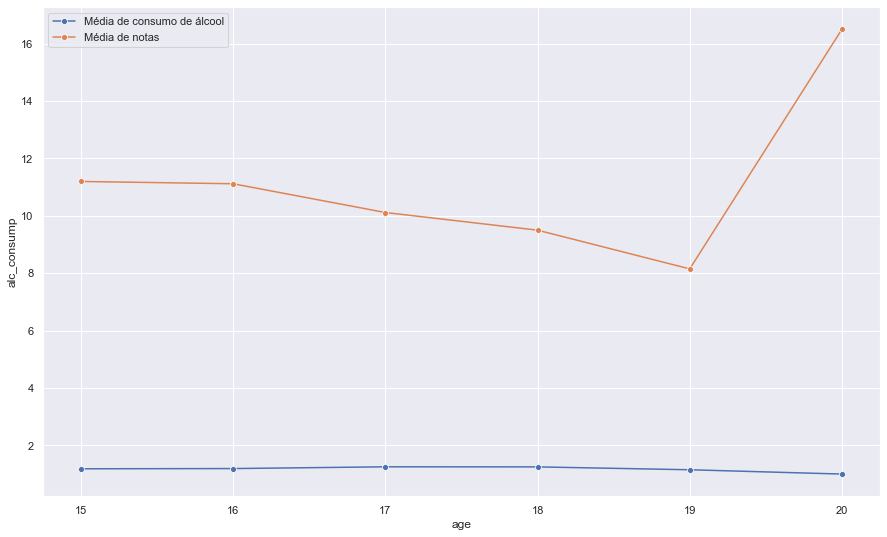

In [17]:
df1 = alcohol_consumption[alcohol_consumption['Dalc'] < 3]
df1

df_1_2 = (df1.groupby('age')
              .agg({'G3': 'mean', 'Dalc': 'mean'}) 
              .reset_index()
              .rename(columns={'Dalc':'alc_consump'}))

df_1_2

sns.lineplot(x='age', y='alc_consump', marker='o',
                         data=df_1_2, label='Média de consumo de álcool', sort=False)
sns.lineplot(x='age', y='G3', marker='o',
                         data=df_1_2, label='Média de notas', sort=False)

<AxesSubplot:xlabel='age', ylabel='alc_consump'>

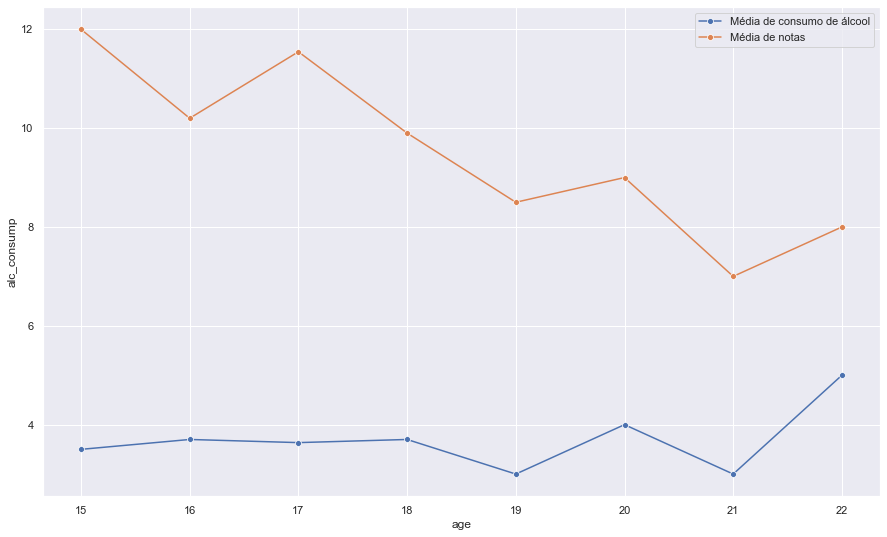

In [18]:
df2 = alcohol_consumption[alcohol_consumption['Dalc'] > 2]
df2

df_3_4_5 = (df2.groupby('age')
              .agg({'G3': 'mean', 'Dalc': 'mean'}) 
              .reset_index()
              .rename(columns={'Dalc':'alc_consump'}))

df_3_4_5

sns.lineplot(x='age', y='alc_consump', marker='o',
                         data=df_3_4_5, label='Média de consumo de álcool', sort=False)
sns.lineplot(x='age', y='G3', marker='o',
                         data=df_3_4_5, label='Média de notas', sort=False)

In [7]:
def t_obs():
  # deve retornar o valor da estatística de teste
  return df_3_4_5['G3'].mean() - df_1_2['G3'].mean()

In [8]:
result = t_obs()
result

-1.5783735528821818

In [9]:
def shuffling(data):
  N = 5000
  filtro = data['G3']
  t_obs2 = t_obs()
  diffs = np.zeros(N)
  for i in range(N):
    np.random.seed(i)
    np.random.shuffle(filtro.values)
    diffs[i] = t_obs2
  return diffs

diffs = shuffling(alcohol_consumption)

In [10]:
def critical_values(diffs):
  # deve retornar uma tupla com os valores criticos
  # calculando percentis para um intervalo de 95% de confiança (5% de significância)
  c_inf = np.percentile(diffs, 2.5)
  c_sup = np.percentile(diffs, 97.5)
  return (c_inf, c_sup)

(c_inf, c_sup) = critical_values(diffs)

In [11]:
def p_value(t_obs, diffs):
  # deve retornar o p-valor ou seja,
  # a probabilidade de termos uma diferença maior que a estatística de teste

  aux = 0
  vetor = diffs > t_obs
  for i in vetor:
      if i == True:
          aux += 1
  pvalue = aux/len(diffs)
  return pvalue

result = t_obs()
foo = p_value(result, diffs)

In [12]:
def resposta2(diffs, t_obs):
  # Retorne True caso rejeite a hipótese nula e False caso não rejeite.
  (c_inf, c_sup) = critical_values(diffs)
  foo = p_value(t_obs, diffs)
  print(foo)
  return not c_inf <= foo <= c_sup

resposta2(diffs, result)

0.0


True

In [88]:
# def ic(df, column):
#     data = df[column]
#     mean = data.mean()
#     std = data.std(ddof=1)
#     se = std / np.sqrt(len(data))
    
#     return (mean - 1.96 * se, mean + 1.96 * se)

In [89]:
# ic(df1, 'G3')

(9.920271047230786, 10.911637784678044)

In [90]:
# ic(df2, 'G3')

(9.493757626478123, 11.324424191703693)

In [19]:
# # Boostrap da diferenca das medias com amostras
# def bootstrap_diff(df1=df1, df2=df2, column='G3', n=5000):
#     '''
#     df1: dataframe com consumo de álcool de 1-2 dias
#     df2: dataframe com consumo de álcool a partir de 3 dias
#     column: a coluna que queremos focar
#     n: número de amostras para o bootstrap
#     '''
#     values = np.zeros(n)
#     for i in range(n):
#         sample1 = df1[column].sample(len(df1), replace=True)
#         sample2 = df2[column].sample(len(df2), replace=True)
#         values[i] = sample1.mean() - sample2.mean()
#     return values

In [20]:
# diff = bootstrap_diff()

In [21]:
# def resposta():
#   # retorna True se a diferença puder ser explicada pelo acaso
#   # retorna False se houver diferença significativa entre as médias
#   df1 = df_1_2
#   df2 = df_3_4_5
#   size1 = len(df1)
#   size2 = len(df2)
#   n = 10000
#   column = 'G3'
#   values1 = np.zeros(n)
#   values2 = np.zeros(n)
#   values_diff = np.zeros(n)
#   for i in range(n):
#       sample1 = df1[column].sample(size1, replace=True, random_state=i)
#       sample2 = df2[column].sample(size2, replace=True, random_state=i*3)
#       values1[i] = sample1.mean()
#       values2[i] = sample2.mean()
#       values_diff[i] = sample1.mean() - sample2.mean()

#   return np.percentile(values_diff, 5) <= 0 <= np.percentile(values_diff, 95)

# result = resposta()
# result

True

### Conclusão 

__A abordagem do Teste de Hipótese demonstra que existe uma relação estatisticamente signifcante entre notas e consumo de álcool. Assim, rejeitamos a hipótese nula e .__